# Исследование закономерностей успешности игр

Перед нами данные о продажах игр интернет-магазина "Стримчик" за 2016 год из открытых источников. А также оценки пользователей и экспертов, жанры и платформы. Наша задача: выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Цель исследования:**
1. Выявить определяющие успешность игры закономерности;
2. Определить потенциально популярный продукт;
3. Спланировать рекламные кампании на следующий год.

**Ход исследования**

Данные о продажах я получу из файла `/datasets/games.csv`. О качестве данных ничего не известно. Поэтому перед тем, как приступать к целям исследования, понадобится обзор данных. 

Я проверю данные на ошибки и оценю их влияние на исследование. Затем, на этапе предобработки, я поищу возможность исправить все ошибки данных, которые не приведут к искажению конечного результата. Далее создам необходимые столбцы и приступлю к проведению исследовательского анализа.

Таким образом, моё исследование пройдёт в шесть этапов:
- Обзор данных.
- Предобработка данных.
- Расчёты и добавление данных в таблицу.
- Проведение исследовательского анализа данных.
- Составление портрета пользователя каждого региона.
- Проверка гипотез.
- Написание общего вывода. 

## Открываем файл с данными и изучаем общую информацию

### Импортируем библиотеку pandas. Считываем данные из csv-файла в датафрейм и сохраняем в переменную  `data`.

In [1]:
# импортируем библиотеку pandas
import pandas as pd

# читаем csv-файл
data = pd.read_csv('/datasets/games.csv')

# выводим его первые десять строк на экран
print(data.head(10))

                        Name Platform  Year_of_Release         Genre  \
0                 Wii Sports      Wii           2006.0        Sports   
1          Super Mario Bros.      NES           1985.0      Platform   
2             Mario Kart Wii      Wii           2008.0        Racing   
3          Wii Sports Resort      Wii           2009.0        Sports   
4   Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
5                     Tetris       GB           1989.0        Puzzle   
6      New Super Mario Bros.       DS           2006.0      Platform   
7                   Wii Play      Wii           2006.0          Misc   
8  New Super Mario Bros. Wii      Wii           2009.0      Platform   
9                  Duck Hunt      NES           1984.0       Shooter   

   NA_sales  EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     41.36     28.96      3.77         8.45          76.0          8      E  
1     29.08      3.58      6.81         0.77     

### Выводим основную информацию о датафрейме с помощью метода `info()`

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Строим общую гистограмму для всех числовых столбцов таблицы

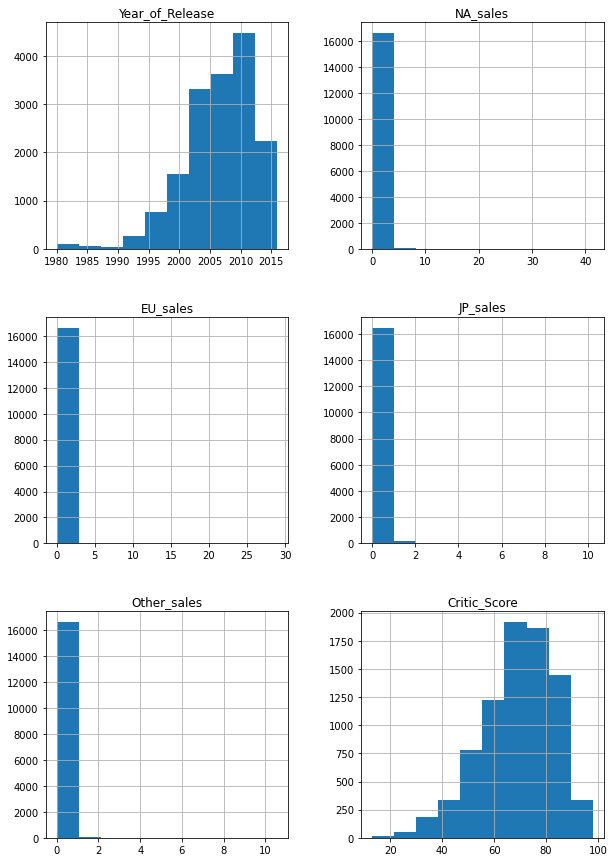

In [3]:
# импортируем библиотеку matplotlib

import matplotlib.pyplot as plt

# cтроим общую гистограмму для всех числовых столбцов таблицы, задав ширину и высоту графика в
# параметре figsize
data.hist(figsize=(10, 15))

# даем команду отобразить гистограмму
plt.show()

**Общий вывод:** 
Датафрейм состоит из 11-ти столбцов и 16715 строк. Преобладает тип данных - вещественные числа. Столбцы 'Name', 'Platform', 'Genre', 'User_Score' и 'Rating' имеют строковый тип данных. В 6-ти столбцах из 11-ти есть пропуски в данных. Общая гистограмма дает первое представление о наиболее часто втречающихся числовых значениях/диапазонах в исходных данных, в каждом из столбцов. Глядя на гистограммы столбцов с количеством продаж, мы можем сделать вывод, что откровенно выбивающихся или аномальных значений (отрицательных) там нет. Более подробно мы будем исследовать столбцы на следующем этапе - предобработке данных.

## Предобработка данных 

### Меняем названия столбцов

In [4]:
# выводим на экран названия столбцов таблицы data
data.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [5]:
# методом 'str.lower' меняем названия столбцов на строчные буквы
data.columns=data.columns.str.lower()

In [6]:
# выводим на экран новые названия столбцов таблицы data
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Изменение типов данных

In [7]:
# импортируем библиотеку numpy
import numpy as np

# меняем тип данных в колонке 'year_of_release' на целочисленный при наличии пропусков
data['year_of_release']=np.floor(pd.to_numeric(data['year_of_release'],\
                                               errors='coerce')).astype('Int64')

# переводим значения 'na_sales' в тысячи копий и меняем тип данных на целый
data['na_sales']=(data['na_sales']*1000).astype(int)

# переводим значения 'eu_sales' в тысячи копий и меняем тип данных на целый
data['eu_sales']=(data['eu_sales']*1000).astype(int)

# переводим значения 'eu_sales' в тысячи копий и меняем тип данных на целый
data['jp_sales']=(data['jp_sales']*1000).astype(int)

# переводим значения 'other_sales' в тысячи копий и меняем тип данных на целый
data['other_sales']=(data['other_sales']*1000).astype(int)

In [8]:
# проверяем как изменились типы данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  int64  
 5   eu_sales         16715 non-null  int64  
 6   jp_sales         16715 non-null  int64  
 7   other_sales      16715 non-null  int64  
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(1), int64(4), object(5)
memory usage: 1.4+ MB


**Вывод:** 
Мы изменили тип данных в столбце 'year_of_release' на целочисленный, так как данные из этого столбца понадобятся нам для дальнейшего анализа. Продажи из столбцов 'na_sales', 'eu_sales', 'jp_sales' и 'other_sales' перевели из млн. в тысячи проданных копий и преобразовали в целочисленный тип данных. Для удобства отображения и дальшейшей работы с данными по продажам. Тип данных для значений в колонках 'user_score' и 'critic_score' мы поменяем в следующем пункте, на этапе обработки пропусков.

### Обработка пропущенных значений

In [9]:
# количество пропущенных значений для каждого столбца в %
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
name,0.000000
platform,0.000000
year_of_release,2.000000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.000000
user_score,40.000000


In [10]:
# удаляем пропущенные значения в столбцах 'genre' и 'name'
data = data.dropna(subset=['genre','name'])

In [11]:
# выводим уникальные значения в столбце 'critic_score'
data['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [12]:
# заменяем пропуски в столбце с оценкой критиков на значение-заглушку
data['critic_score']=data['critic_score'].fillna('without')

In [13]:
# меняем тип данных в колонке 'critic_score' на вещественный
data['critic_score']=pd.to_numeric(data['critic_score'], errors='coerce')

In [14]:
# выводим уникальные значения в столбце 'user_score'
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Помимо числовых значений и пропусков 'nan', в столбце 'user_score' с оценкой пользователей содержится аббревиатура 'tbd' - to be determined. В переводе означает 'предстоит определить'. Вероятно, что пользователи сомневались какую оценку поставить данной игре и оставили этот вопрос нерешенным. Логично, заменить это значение на пустое, так как оно не несет какой-то конкретной информации. 

In [15]:
# заменяем значения 'tbd' в столбце с оценкой пользователей на пустое
data['user_score']=data['user_score'].replace('tbd', 'NaN')

In [16]:
# проверяем, что значения 'tbd' в столбце 'user_score' поменялись
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'NaN', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [17]:
# заменяем пропуски в столбце с оценкой пользователей на значение-заглушку
data['user_score']=data['user_score'].fillna('without')

In [18]:
# меняем тип данных в колонке 'user_score' на вещественный
data['user_score']=pd.to_numeric(data['user_score'], errors='coerce')

In [19]:
# выводим уникальные значения в столбце 'rating'
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [20]:
# заменим пустые значения в столбце 'rating' на значение 'no information'
data['rating']=data['rating'].fillna('no information')

**Вывод:** 
В столбцах 'platform' и 'genre' по 2 пропущенных значения, мы их удалили. В столбце 'year_of_release' всего 2% пропущенных значений, такое незначительное количество данных можно удалить, это не должно повлиять на результаты исследования. Пока оставим пропуски в этой колонке как есть. Пропуски в этой колонке могут быть связаны с человеческим фактором. В столбцах 'critic_score' - 51% и 'user_score' - 40% пропусков, мы заменили их на значения-заглушку для дальнейшей работы с данными. Также мы изменили типы данных в колонке 'critic_score' и 'user_score' на вещественные. Пропуски в этих столбцах возможны из-за отсутствия оценки критиков и пользователей соответственно. В столбце 'rating' мы заменили пропуски на значение 'no information', так это колонка с текстовой информацией. Пропуски в данном столбце могут быт связаны с тем, что для некоторых игр сложно однозначно определить подходящую возрастную категорию. Также пропуски во всех вышеперечисленных столбцах могут быть связаны с технологической ошибкой.

In [21]:
# проверяем как изменились типы данных
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  int64  
 5   eu_sales         16713 non-null  int64  
 6   jp_sales         16713 non-null  int64  
 7   other_sales      16713 non-null  int64  
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           16713 non-null  object 
dtypes: Int64(1), float64(2), int64(4), object(4)
memory usage: 1.5+ MB


### Суммарные продаж во всех регионах

In [22]:
# создаем новый столбец 'sum_sales', где считаем сумму продаж по всем регионам в тыс. копий
data['sum_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)


### Проверка на неявные дубликаты

In [23]:
# выводим уникальные значения в столбце 'platform'
data['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [24]:
# выводим уникальные значения в столбце 'genre'
data['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

### Проверка на явные дубликаты

In [25]:
# посчитаем количество дубликатов в датафрейме
data.duplicated().sum()

0

**Общий вывод:** 
На этапе предобработки данных мы изменили названия столбцов на строчные буквы. Мы изменили типы данных в столбцах - 'year_of_release'; 'na_sales'; 'eu_sales'; 'jp_sales'; 'other_sales'; 'critic_score'; 'user_score', необходимыми дальнейшего исследования. Далее изучили и обработали пропуски в данных: в столбцах 'critic_score' и 'user_score' было много пропусков - 51% и 40%. В столбце 'user_score' мы заменили значение 'tbd' на пропуски, так как они эквиваленты. Пропуски в столбцах с оценками критиков и пользователей мы заменили на значения-заглушки. В столбце 'year_of_release' незначительный процент пропусков - 2%, можно их удалить. И в столбце 'rating'- 40% пропусков, мы заменили их значением 'no information'. И удалили пропуски в столбцах 'name' и 'genre'. После добавили столбец 'sum_sales' с суммарными продажами по всем регионам в тыс. копий. Проверили данные на неявные дубликаты в столбцах 'platform' и 'genre', и явные дубликаты. На данном этапе мы постарались по максимуму оставить данные в исходном виде, стараясь не искажать их лишний раз своими догадками/гипотезами. После предобработки данных наш датасет уменьшился с 16715 до 16713 строк. Сейчас наши данные подготовлены для продолжения анализа.

## Исследовательский анализ данных

### Распределение количества игр по годам

In [26]:
# создаём сводную таблицу с количеством игр в каждом году    
data1 = data.pivot_table(index='year_of_release', values='name', aggfunc='count').reset_index()

# выводим сводную таблицу на экран
data1

,year_of_release,name
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14
5,1985,14
6,1986,21
7,1987,16
8,1988,15
9,1989,17


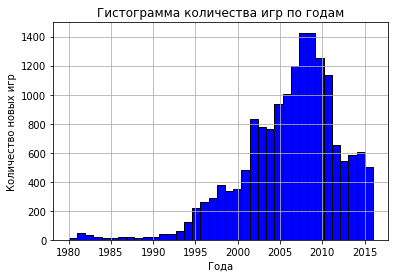

In [27]:
# строим гистограмму для визуализации данных
data['year_of_release'].hist(color = 'blue', edgecolor = 'black', bins=37)

plt.title('Гистограмма количества игр по годам')
plt.xlabel('Года')
plt.ylabel('Количество новых игр')

# даем команду отобразить гистограмму
plt.show()


**Вывод:** 
На основе полученных данным можно сделать выводы, что с 1980-1993 г. выпуск новых игр был небольшой, до 100 в год. В период с 1994-2000 г. наблюдается рост в создании новых игр до 400 в год. С 2002-2010 г. мы видим скачок в создании игр до 1000-1400 новых игр в год. Наибольший пик приходится на 2008 и 2009 годы. И начиная с 2011 года количество новых игр начинает падать и к 2012 г. падает почти вдвое.

### Изменение продаж по платформам

In [28]:
# создаём сводную таблицу с суммарными продажами по платформам   
data2 = data.pivot_table(index='platform', \
                         values='sum_sales', aggfunc='sum').reset_index()

# выводим сводную таблицу на экран, остортировав суммарные продажи по убыванию
data2.sort_values(by='sum_sales', ascending=False)

,platform,sum_sales
16,PS2,1255767
28,X360,971419
17,PS3,939646
26,Wii,907508
4,DS,806120
15,PS,730857
6,GBA,317850
18,PS4,314140
19,PSP,294050
13,PC,259519


In [29]:
# создаем новый датафрейм, где платформа - 'PS2'
data_ps2=data.loc[(data['platform'] == 'PS2')]

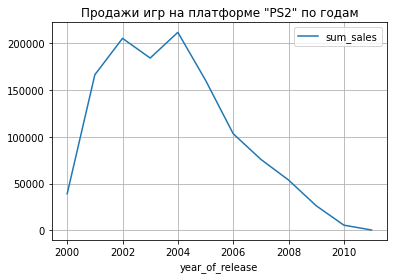

In [30]:
# строим график для выявления зависимости суммарных продаж от года

# используем сводную таблицу с суммарными значениями продаж игр   
data_ps2.pivot_table(index='year_of_release', values='sum_sales', aggfunc='sum')\
.plot(grid=True, title = 'Продажи игр на платформе "PS2" по годам')

# даем команду отобразить график
plt.show()

In [31]:
# создаем новый датафрейм, где платформа - 'X360'
data_x360=data.loc[(data['platform'] == 'X360')]

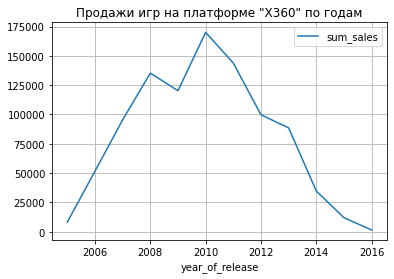

In [32]:
# строим график для выявления зависимости суммарных продаж от года

# используем сводную таблицу с суммарными значениями продаж игр   
data_x360.pivot_table(index='year_of_release', values='sum_sales', aggfunc='sum')\
.plot(grid=True, title = 'Продажи игр на платформе "X360" по годам')

# даем команду отобразить график
plt.show()

In [33]:
# создаем новый датафрейм, где платформа - 'PS3'
data_ps3=data.loc[(data['platform'] == 'PS3')]

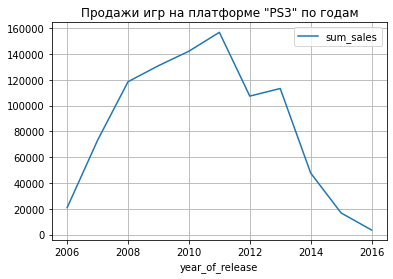

In [34]:
# строим график для выявления зависимости суммарных продаж от года

# используем сводную таблицу с суммарными значениями продаж игр   
data_ps3.pivot_table(index='year_of_release', values='sum_sales', aggfunc='sum')\
.plot(grid=True, title = 'Продажи игр на платформе "PS3" по годам')

# даем команду отобразить график
plt.show()

In [35]:
# создаем новый датафрейм, где платформа - 'Wii'
data_wii=data.loc[(data['platform'] == 'Wii')]

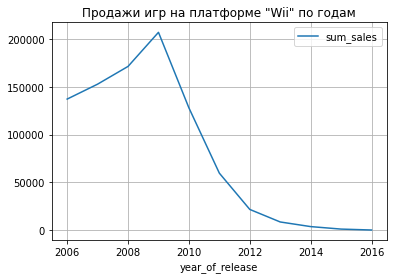

In [36]:
# строим график для выявления зависимости суммарных продаж от года

# используем сводную таблицу с суммарными значениями продаж игр   
data_wii.pivot_table(index='year_of_release', values='sum_sales', aggfunc='sum')\
.plot(grid=True, title = 'Продажи игр на платформе "Wii" по годам')

# даем команду отобразить график
plt.show()

In [37]:
# создаем новый датафрейм, где платформа - 'DS'
data_ds=data.loc[(data['platform'] == 'DS')]

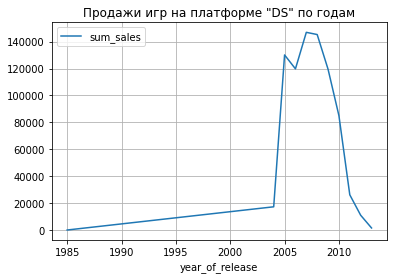

In [38]:
# строим график для выявления зависимости суммарных продаж от года

# используем сводную таблицу с суммарными значениями продаж игр   
data_ds.pivot_table(index='year_of_release', values='sum_sales', aggfunc='sum')\
.plot(grid=True, title = 'Продажи игр на платформе "DS" по годам')

# даем команду отобразить график
plt.show()

**Вывод:** 
мы рассмотрели платформы с наибольшими суммарными продажами - PS2, X360, PS3, Wii и DS  и построили для них распределение по годам. На графиках виден срок жизненного цикла платформы - это примерно 10 лет. Исключение составляет платформа DS, у неё жизненный цикл дольше. Но наиболее активный рост и падение также составляют порядка 10 лет, примерно 50 на 50. Около 5 лет наблюдается рост и следующие 5 лет - падение. 

### Выбор актуального периода исследования

Для дальнейшего анализа мы выбираем данные период с 2012 года, он будет примерно равен начале работы действующих платформ и не будет включать неработающие платформы прошлых лет. Нам нужно построить прогноз на 2017 год, поэтому логично будет взять относительно недавний период. Актуальный период с 2012-2016 г.

In [39]:
# создаем новый датафрейм, с актуальным периодом для исследования
dt=data.loc[(data['year_of_release'] >= 2012)]

### Выбор потенциально прибыльных платформ

In [40]:
# coздаём сводную таблицу с суммарными значениями продаж игр по платформам и по годам  
dt_platform = dt.pivot_table(index='year_of_release', columns='platform',\
                             values='sum_sales', aggfunc='sum')
# выводим таблицу на экран
dt_platform

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2012,51359.0,11010.0,23220.0,107360.0,NaN,7690.0,16190.0,21710.0,17560.0,99740.0,NaN
2013,56570.0,1540.0,12380.0,113250.0,25990.0,3140.0,10590.0,8590.0,21650.0,88580.0,18960.0
2014,43760.0,NaN,13280.0,47759.0,100000.0,240.0,11900.0,3750.0,22030.0,34740.0,54070.0
2015,27780.0,NaN,8520.0,16820.0,118900.0,120.0,6250.0,1140.0,16350.0,11960.0,60140.0
2016,15140.0,NaN,5250.0,3600.0,69250.0,NaN,4250.0,180.0,4600.0,1520.0,26150.0


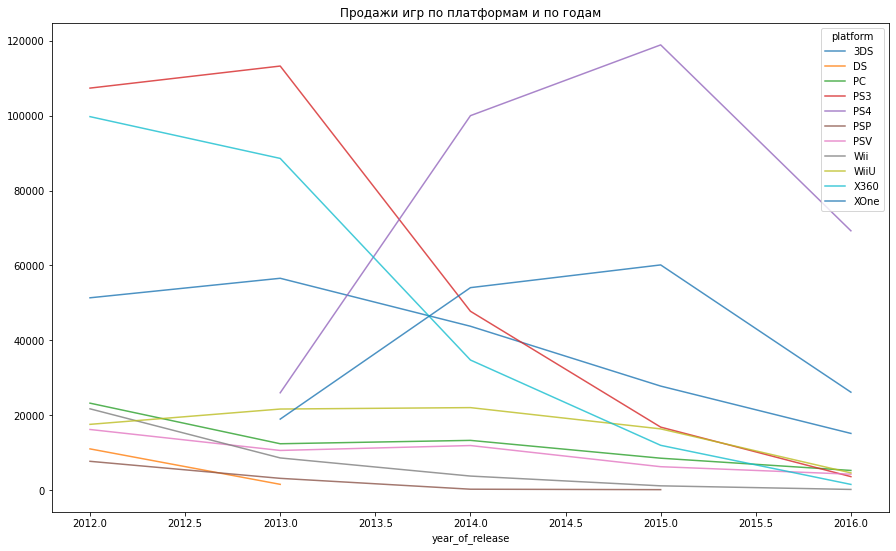

In [41]:
# строим график для выявления зависимости суммарных продаж от платформы
dt_platform.plot(figsize=(15,9), alpha=0.8, title = 'Продажи игр по платформам и по годам')

# даем команду отобразить график
plt.show()

**Вывод:** 
Данные за 2016 год могут быть неполными, ориентируемся на 2015 год. По продажам лидирует платформы - PS4, XOne. Продажи по ним растут. Также по продажам лидирует платформа - 3DS, после неё платформы - PC и WiiU, но продажи по ним падают. Соответственно, потенциально прибыльные платформы, которые растут - PS4, XOne.

### Строим график «ящик с усами» по продажам игр в разбивке по платформам

In [42]:
# создаём сводную таблицу с суммарными продажами по платформам   
dt_platform2 = dt.pivot_table(index='platform', \
                         values='sum_sales', aggfunc='sum').reset_index()

# сортируем сумму продаж по убывнию и сохраняем в новую таблицу
top_platfom = dt_platform2.sort_values(by='sum_sales', ascending=False)

# выводим таблицу на экран
top_platfom

,platform,sum_sales
4,PS4,314140
3,PS3,288789
9,X360,236540
0,3DS,194609
10,XOne,159320
8,WiiU,82190
2,PC,62650
6,PSV,49180
7,Wii,35370
1,DS,12550


Топ-5 платформ по продажам: 'PS4', 'PS3', 'X360', '3DS', 'XOne'.

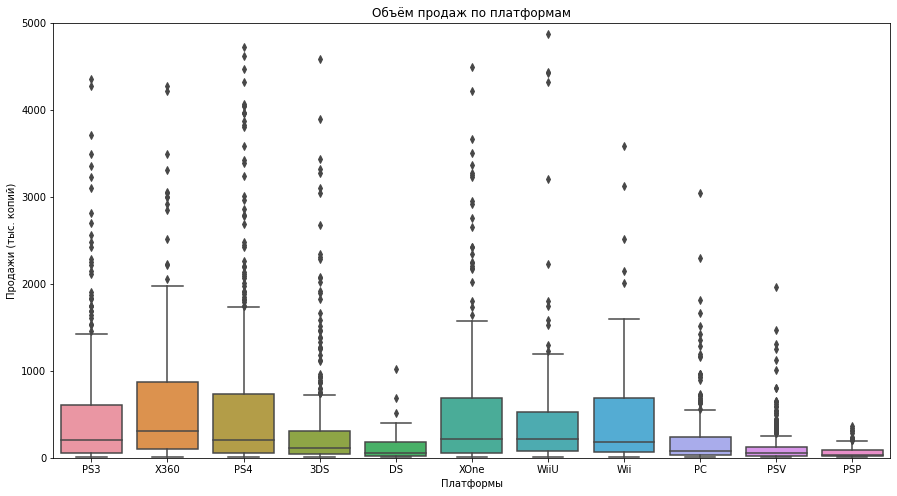

In [43]:
# импортируем библиотеку seaborn
import seaborn as sns

# импортируем библиотеку matplotlib
import matplotlib.pyplot as plt

# строим график 'ящик с усами' по продажам по платформам
# задаем фигуру
plt.figure(figsize=(15, 8))
# задаём границы по оси y
plt.ylim(0, 5000)
# строим графики 'ящик с усами'
sns.boxplot(x = dt['platform'], y = dt['sum_sales'])
plt.title('Объём продаж по платформам')
plt.ylabel('Продажи (тыс. копий)')
plt.xlabel('Платформы')

# даем команду отобразить график
plt.show()

Мы построили график в большом масштабе, на нем видны выбросы по каждой из платформ. Выбросов, высоких значений достаточно много у платформ - 'PS4', 'PS3', '3DS', 'XOne', 'Х360'. То есть у тех платформ, которые мы выделили в топ-5 по продажам.

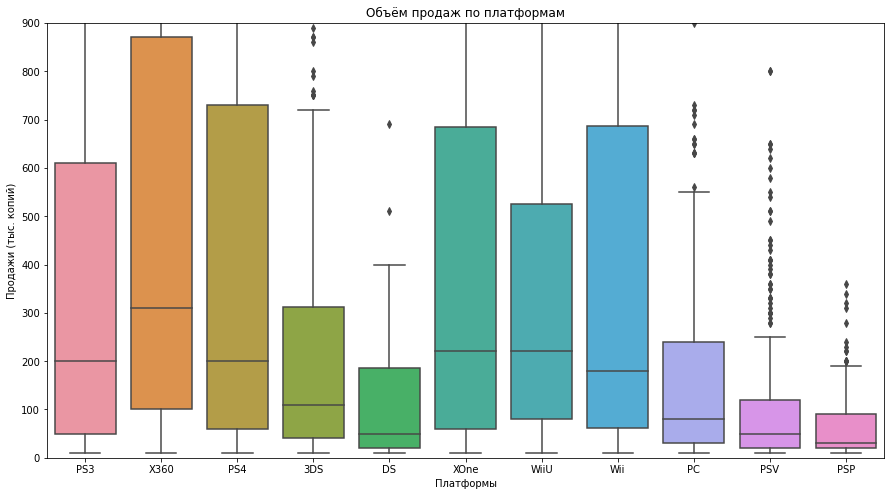

In [44]:
# строим график 'ящик с усами' по продажам по платформам в меньшем масштабе
# задаем фигуру
plt.figure(figsize=(15, 8))
# задаём границы по оси y
plt.ylim(0, 900)
# строим графики 'ящик с усами'
sns.boxplot(x = dt['platform'], y = dt['sum_sales'])
plt.title('Объём продаж по платформам')
plt.ylabel('Продажи (тыс. копий)')
plt.xlabel('Платформы')

# даем команду отобразить график
plt.show()

Если же сравнить медианные значения продаж по платформам, то здесь лидирует 'X360', после 'XOne' и 'WiiU', затем 'PS3' и 'PS4'. 

### Взаимосвязь продаж от отзывов критиков и пользователей

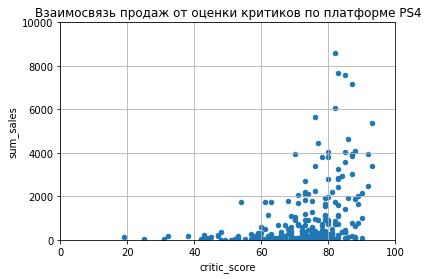

0.40656790206178106


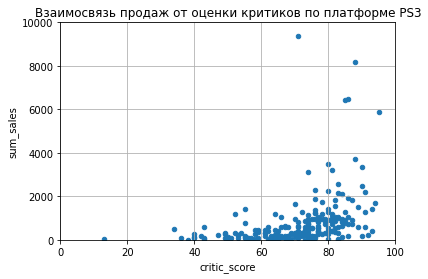

0.3314972592629592


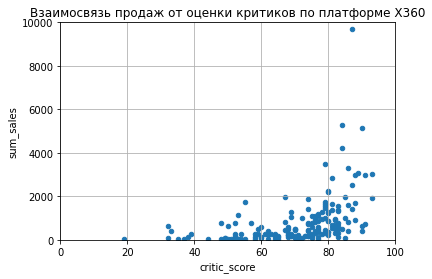

0.3605734888507337


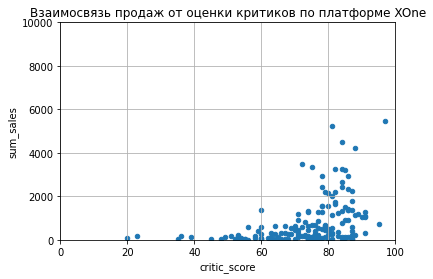

0.41699832800840153


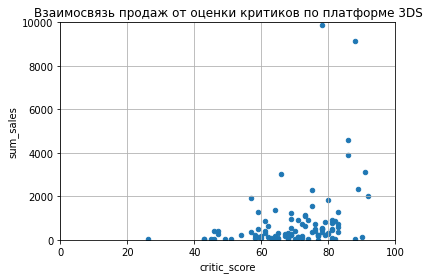

0.32080496568207184


In [45]:
# создаём список для 'популярных' платформ
platforms = ['PS4', 'PS3', 'X360', 'XOne', '3DS']

# удаляем пропуски в поле 'critic_score', сохраняем результат в новой таблице
dt1_corr = dt.dropna(subset=['critic_score'])

# пишем цикл для построения диаграмм рассеяния и коэф. Пирсона 
for i in platforms:

# перебираем платформы из списка 'platforms'
    i_platform = dt1_corr[dt1_corr['platform'] == i]

# строим диаграмму рассеяния для выявления зависимости продаж от оценки критиков
    i_platform.plot(x='critic_score', y='sum_sales', kind='scatter', grid=True,\
    title = 'Взаимосвязь продаж от оценки критиков по платформе '+i, ylim=(0,10000), xlim=(0,100))

# даем команду отобразить график
    plt.show()

# посчитаем коэффициент корреляции Пирсона
    print(i_platform['critic_score'].corr(i_platform['sum_sales']))

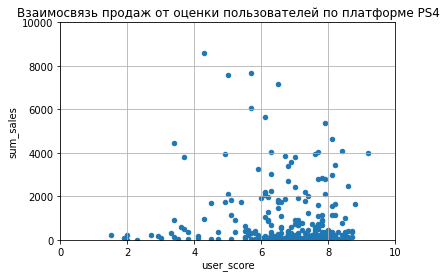

-0.03195711020455645


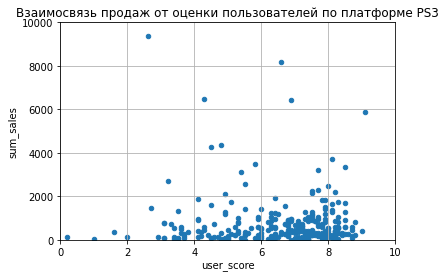

-0.00514352288711379


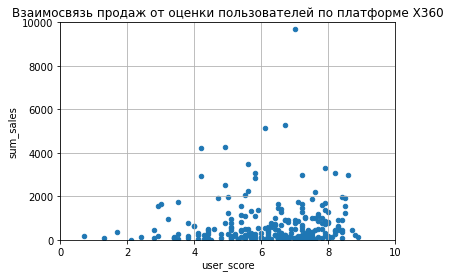

0.006163978646213387


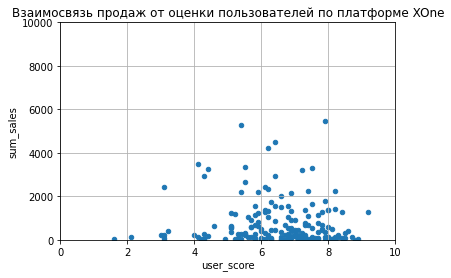

-0.06892505328279422


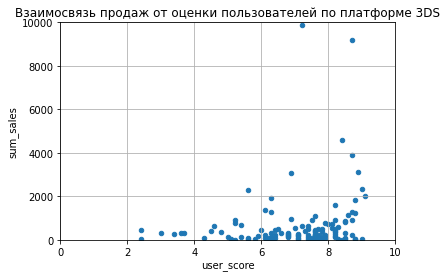

0.1975829747870273


In [46]:
# удаляем пропуски в поле 'user_score', сохраняем результат в новой таблице
dt2_corr = dt.dropna(subset=['user_score'])

# пишем цикл для построения диаграмм рассеяния и коэф. Пирсона 
for i in platforms:
    
# перебираем платформы из списка 'platforms'
    i_platform = dt2_corr[dt2_corr['platform'] == i]
    
# строим диаграмму рассеяния для выявления зависимости продаж от оценки пользователей
    i_platform.plot(x='user_score', y='sum_sales', kind='scatter', grid=True,\
    title = 'Взаимосвязь продаж от оценки пользователей по платформе '+i, ylim=(0,10000), xlim=(0,10))

# даем команду отобразить график
    plt.show()

# посчитаем коэффициент корреляции Пирсона
    print(i_platform['user_score'].corr(i_platform['sum_sales']))

**Вывод:** коэффициенты Пирсона, по взаимосвязи продаж от оценки критиков по платформам - PS4, PS3, X360, XOne, 3DS соответственно равны - 0.41, 0.33, 0.36, 0.42, 0.32. Что говорит об умеренной прямой связи между ними. Коэффициенты Пирсона, по взаимосвязи продаж от оценки пользователей по платформам - PS4, PS3, X360, XOne, 3DS соответственно равны: -0.03, -0.01, 0.01, -0.06, 0.2. Такие коэффициенты говорят о слабой связи между оценкой пользователей и продажами. 

### Распределение игр по жанрам

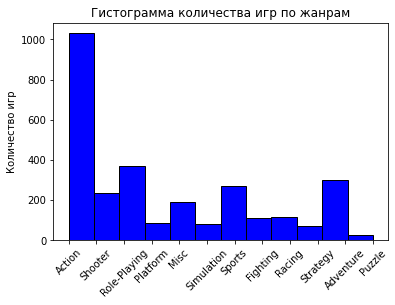

In [47]:
# строим гистограмму для визуализации данных
dt['genre'].hist(color = 'blue', edgecolor = 'black', bins=12)

plt.title('Гистограмма количества игр по жанрам')
plt.ylabel('Количество игр')
plt.xticks(rotation=45)
plt.grid(False)

# даем команду отобразить гистограмму
plt.show()

Глядя на график, можно сделать вывод, что больше всего игр выпускают в жанре 'Action', это самый популярный жанр. После по популярности идут жанры - 'Role-Playing' и 'Anventure'. Самый непопулярный жанр в играх - 'Puzzle'.

In [48]:
# строим сводную таблицу по медианным и суммарным продажам по жанрам
dt_genre = dt.pivot_table(index='genre', values='sum_sales', \
                          aggfunc={'sum', 'median'}).reset_index()

# выводим таблицу отсортировав медианные значения по убыванию
dt_genre.sort_values(by='median', ascending=False)

,genre,median,sum
8,Shooter,440,304730
10,Sports,240,181070
4,Platform,210,61000
6,Racing,140,53500
7,Role-Playing,140,192800
2,Fighting,130,44490
0,Action,120,441120
3,Misc,120,85039
9,Simulation,120,35119
11,Strategy,80,13340


По значениям в таблице 'dt_genre' мы видим, что самые прибыльные жанры, посчитанные по медианным и суммарным продажам отличаются. Если смотреть по суммарным продажам, то самым прибыльным будет жанр - 'Action'. Судя по медианным продажам, самым прибыльным будет - 'Shooter'. Такая разница может быть, так как продажи по жанрам для разных платформ могут отличаться. На каких-то платформах они растут,а где-то падают. Но в итоге это никак не отобразиться на суммарных продажах. Поэтому, лучше здесь использовать медианные продажи по жанрам.

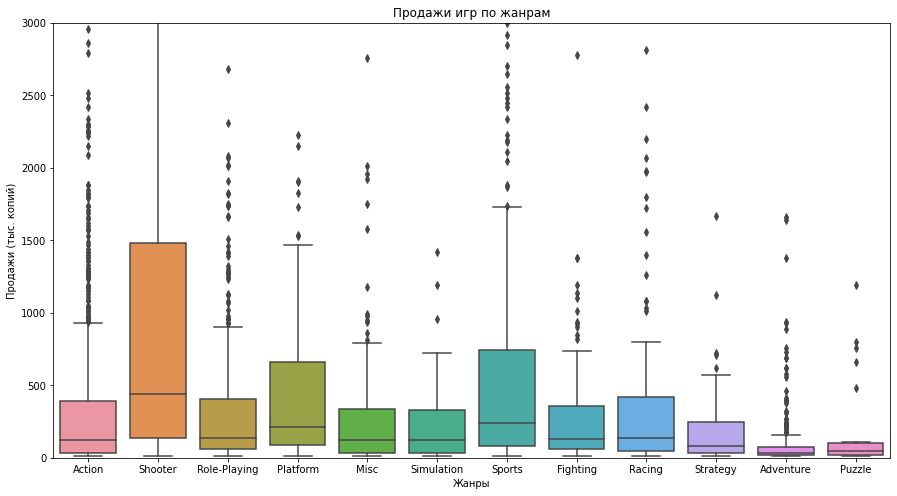

In [49]:
# строим график 'ящик с усами' по продажам по жанрам
# задаем фигуру
plt.figure(figsize=(15, 8))
# задаём границы по оси y
plt.ylim(0, 3000)
# строим графики 'ящик с усами'
sns.boxplot(x = dt['genre'], y = dt['sum_sales'])
plt.title('Продажи игр по жанрам')
plt.ylabel('Продажи (тыс. копий)')
plt.xlabel('Жанры')

# даем команду отобразить график
plt.show()

**Вывод:** по медианным значениям продаж на графике выше, мы видим, что стабильно наиболее прибыльные жанры -  'Shooter', 'Sports' и 'Platform'. Наименее прибыльные жанры - 'Adventure' и 'Puzzle'.

**Общий вывод:** на этапе исследовательского анализа данных мы выбрали актуальный период для нашего исследования - 2012-2016 г. Который поможет нам построить прогноз на 2017 год. Здесь мы выделили потенциально прибыльные платформы, которые растут - PS4, XOne. Определили, что нет прямой взаимосвязи между оценками критиков и пользователей и продажами игр на популярных платформах. И выделили наиболее прибыльные жанры - 'Shooter', 'Sports' и 'Platform'; наименее прибыльные жанры - 'Adventure' и 'Puzzle'.

## Составляем портрет пользователя каждого региона

### Самые популярные платформы

**Северная Америка**

In [50]:
# определяем самые прибыльные платформы в Северной Америке
dt.groupby('platform')['na_sales'].sum().sort_values(ascending=False)

platform
X360    140050
PS4     108740
PS3     103379
XOne     93120
3DS      55309
WiiU     38100
PC       19120
Wii      17450
PSV      10980
DS        4590
PSP        130
Name: na_sales, dtype: int64

In [51]:
# создаем список с топ-5 прибыльными платформами в Северной Америке
list_platform_na=['X360','PS4','PS3','XOne','3DS']

# создаём сводную таблицу, которая включает суммарные продажи по топ-5 платформам в Сев. Америке 
dt_platform_na=dt[dt['platform'].isin(list_platform_na)==True].pivot_table(index='platform',\
                                                                          values='na_sales',\
                                                                          aggfunc='sum')
# выводим таблицу на экран
dt_platform_na.reset_index()

,platform,na_sales
0,3DS,55309
1,PS3,103379
2,PS4,108740
3,X360,140050
4,XOne,93120


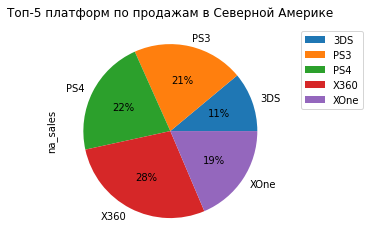

In [52]:
# создаем круговую диаграмму для визуалиации
dt_platform_na.plot(kind='pie', y='na_sales', autopct='%1.0f%%',\
                    title='Топ-5 платформ по продажам в Северной Америке')

# двигаем легенду
plt.legend(loc=(1.1, 0.600))

# даем команду отобразить график
plt.show()

**Вывод:** в Северной Америке самая высокая доля - 28% продаж из топ-5 приходится на платформу 'X360', самая низкая доля - 11% на платформу - '3DS'. Доля продаж по остальным топ-5 платформам распределена примерно одинаково.

**Европа**

In [53]:
# определяем самые прибыльные платформы в Европе
dt.groupby('platform')['eu_sales'].sum().sort_values(ascending=False)

platform
PS4     141090
PS3     106860
X360     74520
XOne     51590
3DS      42640
PC       37760
WiiU     25130
Wii      11920
PSV      11360
DS        3530
PSP        420
Name: eu_sales, dtype: int64

In [54]:
# создаем список с топ-5 прибыльными платформами в Европе
list_platform_eu=['PS4','PS3','X360','XOne','3DS']

# создаём сводную таблицу, которая включает суммарные продажи по топ-5 платформам в Европе
dt_platform_eu=dt[dt['platform'].isin(list_platform_eu)==True].pivot_table(index='platform',\
                                                                          values='eu_sales',\
                                                                          aggfunc='sum')
# выводим таблицу на экран
dt_platform_eu.reset_index()

,platform,eu_sales
0,3DS,42640
1,PS3,106860
2,PS4,141090
3,X360,74520
4,XOne,51590


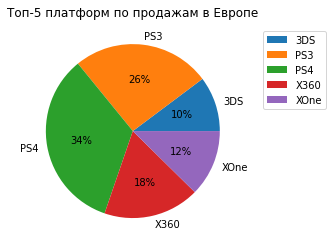

In [55]:
# создаем круговую диаграмму для визуалиации
dt_platform_eu.plot(kind='pie', y='eu_sales', autopct='%1.0f%%',\
                    title='Топ-5 платформ по продажам в Европе', ylabel='')

# двигаем легенду
plt.legend(loc=(1.1, 0.600))

# даем команду отобразить график
plt.show()

**Вывод:** в Европе самая высокая доля - 34% продаж из топ-5 приходится на платформу 'PS4', самая низкая доля - 10% на платформу - '3DS'.

**Япония**

In [56]:
# определяем самые прибыльные платформы в Японии
dt.groupby('platform')['jp_sales'].sum().sort_values(ascending=False)

platform
3DS     87790
PS3     35290
PSV     21040
PS4     15960
WiiU    13010
PSP     10470
DS       3720
Wii      3390
X360     1570
XOne      340
PC          0
Name: jp_sales, dtype: int64

In [57]:
# создаем список с топ-5 прибыльными платформами в Японии
list_platform_jp=['3DS','PS3','PSV','PS4','WiiU']

# создаём сводную таблицу, которая включает суммарные продажи по топ-5 платформам в Европе
dt_platform_jp=dt[dt['platform'].isin(list_platform_jp)==True].pivot_table(index='platform',\
                                                                          values='jp_sales',\
                                                                          aggfunc='sum')
# выводим таблицу на экран
dt_platform_jp.reset_index()

,platform,jp_sales
0,3DS,87790
1,PS3,35290
2,PS4,15960
3,PSV,21040
4,WiiU,13010


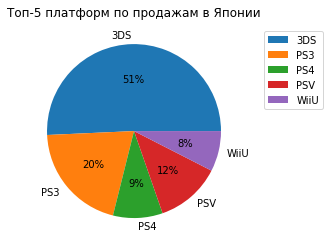

In [58]:
# создаем круговую диаграмму для визуалиации
dt_platform_jp.plot(kind='pie', y='jp_sales', autopct='%1.0f%%',\
                    title='Топ-5 платформ по продажам в Японии', ylabel='')

# двигаем легенду
plt.legend(loc=(1.1, 0.600))

# даем команду отобразить график
plt.show()

**Вывод:** в Японии самая преобладающая доля - 51% продаж из топ-5 приходится на платформу '3DS', самая низкая доля - 8% на платформу - 'WiiU'.

### Самые популярные жанры

**Северная Америка**

In [59]:
# определяем самые популярные жанры в Северной Америке
dt.groupby('genre')['na_sales'].sum().sort_values(ascending=False)

genre
Action          177840
Shooter         144770
Sports           81530
Role-Playing     64000
Misc             38189
Platform         25380
Fighting         19790
Racing           17220
Adventure         8920
Simulation        7969
Strategy          4230
Puzzle            1130
Name: na_sales, dtype: int64

In [60]:
# создаем список с топ-5 популярными жанрами в Северной Америке
list_genre_na=['Action','Shooter','Sports','Role-Playing','Misc']

# создаём сводную таблицу, которая включает суммарные продажи по топ-5 жанрам в Сев. Америке 
dt_genre_na=dt[dt['genre'].isin(list_genre_na)==True].pivot_table(index='genre',\
                                                                          values='na_sales',\
                                                                          aggfunc='sum')
# выводим таблицу на экран
dt_genre_na.reset_index()

,genre,na_sales
0,Action,177840
1,Misc,38189
2,Role-Playing,64000
3,Shooter,144770
4,Sports,81530


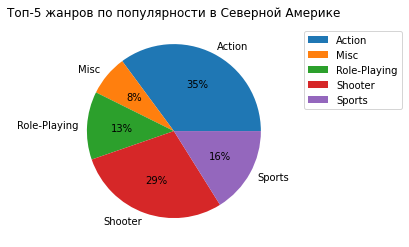

In [61]:
# создаем круговую диаграмму для визуалиации
dt_genre_na.plot(kind='pie', y='na_sales', autopct='%1.0f%%',\
                    title='Топ-5 жанров по популярности в Северной Америке', ylabel='')

# двигаем легенду
plt.legend(loc=(1.1, 0.600))

# даем команду отобразить график
plt.show()

**Вывод:** в Северной Америке самый популярный жанр из топ-5 - 'Action', на него приходится 35% продаж. Наименее полулярный жанр из топ-5 - 'Misc', на него приходится 8% продаж.

**Европа**

In [62]:
# определяем самые популярные жанры в Европе
dt.groupby('genre')['eu_sales'].sum().sort_values(ascending=False)

genre
Action          159340
Shooter         113470
Sports           69090
Role-Playing     48530
Racing           27290
Misc             26320
Platform         21410
Simulation       14550
Fighting         10790
Adventure         9460
Strategy          5170
Puzzle            1400
Name: eu_sales, dtype: int64

In [63]:
# создаем список с топ-5 популярными жанрами в Европе
list_genre_eu=['Action','Shooter','Sports','Role-Playing','Racing']

# создаём сводную таблицу, которая включает суммарные продажи по топ-5 жанрам в Сев. Америке 
dt_genre_eu=dt[dt['genre'].isin(list_genre_eu)==True].pivot_table(index='genre',\
                                                                          values='eu_sales',\
                                                                          aggfunc='sum')
# выводим таvблицу на экран
dt_genre_eu.reset_index()

,genre,eu_sales
0,Action,159340
1,Racing,27290
2,Role-Playing,48530
3,Shooter,113470
4,Sports,69090


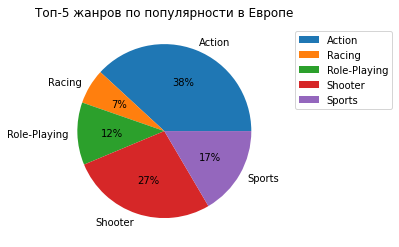

In [64]:
# создаем круговую диаграмму для визуалиации
dt_genre_eu.plot(kind='pie', y='eu_sales', autopct='%1.0f%%',\
                    title='Топ-5 жанров по популярности в Европе', ylabel='')

# двигаем легенду
plt.legend(loc=(1.1, 0.600))

# даем команду отобразить график
plt.show()

**Вывод:** в Европе самый популярный жанр из топ-5 - 'Action', на него приходится 38% продаж. Наименее полулярный жанр из топ-5 - 'Racing', на него приходится 7% продаж.

**Япония**

In [65]:
# определяем самые популярные жанры в Японии
dt.groupby('genre')['jp_sales'].sum().sort_values(ascending=False)

genre
Role-Playing    65440
Action          52800
Misc            12860
Simulation      10410
Fighting         9440
Shooter          9230
Platform         8630
Adventure        8240
Sports           8010
Strategy         2880
Racing           2500
Puzzle           2140
Name: jp_sales, dtype: int64

In [66]:
# создаем список с топ-5 популярными жанрами в Японии
list_genre_jp=['Role-Playing','Action','Misc','Simulation','Fighting']

# создаём сводную таблицу, которая включает суммарные продажи по топ-5 жанрам в Сев. Америке 
dt_genre_jp=dt[dt['genre'].isin(list_genre_jp)==True].pivot_table(index='genre',\
                                                                          values='jp_sales',\
                                                                          aggfunc='sum')
# выводим таvблицу на экран
dt_genre_jp.reset_index()

,genre,jp_sales
0,Action,52800
1,Fighting,9440
2,Misc,12860
3,Role-Playing,65440
4,Simulation,10410


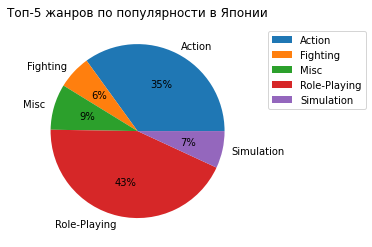

In [67]:
# создаем круговую диаграмму для визуалиации
dt_genre_jp.plot(kind='pie', y='jp_sales', autopct='%1.0f%%',\
                    title='Топ-5 жанров по популярности в Японии', ylabel='')

# двигаем легенду
plt.legend(loc=(1.1, 0.600))

# даем команду отобразить график
plt.show()

**Вывод:** в Японии самый популярный жанр из топ-5 - 'Role-Playing', на него приходится 43% продаж. Наименее полулярный жанр из топ-5 - 'Fighting', на него приходится 7% продаж.

### Влияние рейтинга ESRB на продажи 

**Северная Америка**

In [68]:
# посмотрим распределение продаж по рейтингу ESRB в Северной Америке
dt_rating_na = dt.groupby('rating')['na_sales'].sum().sort_values(ascending=False)

# выводим таблицу на экран
dt_rating_na

rating
M                 231570
E                 114369
no information    103309
E10+               75700
T                  66020
Name: na_sales, dtype: int64

In [69]:
# создаём сводную таблицу продаж по рейтингам  в Сев. Америке, без значения 'no information'
dt_rating_na=dt[dt['rating']!='no information'].pivot_table(index='rating',\
                                                                          values='na_sales',\
                                                                          aggfunc='sum')
# выводим таблицу на экран
dt_rating_na.reset_index()

,rating,na_sales
0,E,114369
1,E10+,75700
2,M,231570
3,T,66020


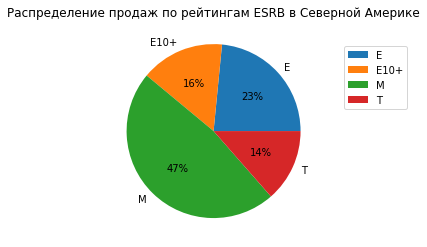

In [70]:
# создаем круговую диаграмму для визуалиации
dt_rating_na.plot(kind='pie', y='na_sales', autopct='%1.0f%%',\
                    title='Распределение продаж по рейтингам ESRB в Северной Америке', ylabel='')

# двигаем легенду
plt.legend(loc=(1.1, 0.600))

# даем команду отобразить график
plt.show()

**Вывод:** в Северной Америке самая большая доля продаж приходится на игры с рейтигом 'M' - 47%, подходит для лиц страше 17. Самая маленькая доля продаж приходится на рейтинг 'E10+' - 16%, подходит для лиц старше 10 лет.

**Европа**

In [71]:
# посмотрим распределение продаж по рейтингу ESRB в Европе
dt_rating_eu = dt.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)

# выводим таблицу на экран
dt_rating_eu

rating
M                 193960
E                 113030
no information     91500
E10+               55370
T                  52960
Name: eu_sales, dtype: int64

In [72]:
# создаём сводную таблицу продаж по рейтингам  в Европе, без значения 'no information'
dt_rating_eu=dt[dt['rating']!='no information'].pivot_table(index='rating',\
                                                                          values='eu_sales',\
                                                                          aggfunc='sum')
# выводим таблицу на экран
dt_rating_eu.reset_index()

,rating,eu_sales
0,E,113030
1,E10+,55370
2,M,193960
3,T,52960


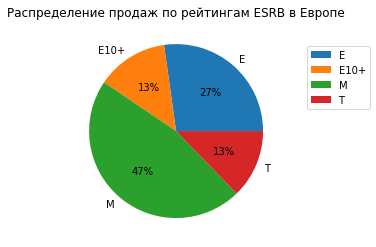

In [73]:
# создаем круговую диаграмму для визуалиации
dt_rating_eu.plot(kind='pie', y='eu_sales', autopct='%1.0f%%',\
                    title='Распределение продаж по рейтингам ESRB в Европе', ylabel='')

# двигаем легенду
plt.legend(loc=(1.1, 0.600))

# даем команду отобразить график
plt.show()

**Вывод:** в Европе самая большая доля продаж приходится на игры с рейтигом 'M' - 47%, подходит для лиц страше 17. Самая маленькие доли продаж приходится на рейтинг 'E10+' и 'T' - 13% (подходит для лиц старше 10 лет и старше 13 лет соответственно).

**Япония**

In [74]:
# посмотрим распределение продаж по рейтингу ESRB в Японии
dt_rating_jp = dt.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)

# выводим таблицу на экран
dt_rating_jp

rating
no information    108840
E                  28330
T                  26020
M                  21200
E10+                8190
Name: jp_sales, dtype: int64

In [75]:
# создаём сводную таблицу продаж по рейтингам  в Японии, без значения 'no information'
dt_rating_jp=dt[dt['rating']!='no information'].pivot_table(index='rating',\
                                                                          values='jp_sales',\
                                                                          aggfunc='sum')
# выводим таблицу на экран
dt_rating_jp.reset_index()

,rating,jp_sales
0,E,28330
1,E10+,8190
2,M,21200
3,T,26020


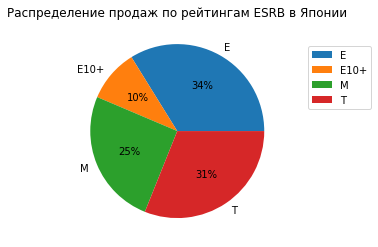

In [76]:
# создаем круговую диаграмму для визуалиации
dt_rating_jp.plot(kind='pie', y='jp_sales', autopct='%1.0f%%',\
                    title='Распределение продаж по рейтингам ESRB в Японии', ylabel='')

# двигаем легенду
plt.legend(loc=(1.1, 0.600))

# даем команду отобразить график
plt.show()

**Вывод:** в Японии самая большая доля продаж приходится на игры с рейтигом 'E' - 34%, подходит для всех возрастных категорий. Самая маленькие доли продаж приходится на рейтинг 'E10+' - 10%, подходит для лиц старше 10 лет.

**Общий вывод**
На этом шаге мы можем составить портрет пользователя для каждого региона:
1. Пользователь в Северной Америке - старше 17 лет, играет на приставке Xbox 360, в игру жанра 'боевик' 
2. Пользователь в Европе - старше 17-ти лет, играет на приставке PlayStation 4, в игру жанра 'боевик'
3. Пользователь в Японии - неопределенного возрата, играет на приставке Nintendo 3DS в ролевые игры.

Предпочтения пользователй из Японии отличаются от предпочтений пользоавтелей из Европы и Северной Америки.

## Проверка гипотез

### Гипотеза о равенстве средних пользовательскиx рейтингов платформ Xbox One и PC

In [77]:
# импортируем библиотеки
from scipy import stats as st
import numpy as np

# создаем новую таблицу со значениями пользовательской оценки для платформы Xbox One 
xone_rating = dt[dt['platform']=='XOne']['user_score']

# удаляем пропуски из таблицы
xone_rating = xone_rating.dropna()

# создаем новую таблицу со значениями пользовательской оценки для платформы PC 
pc_rating = dt[dt['platform']=='PC']['user_score']

# удаляем пропуски из таблицы
pc_rating = pc_rating.dropna()

# посчитаем дисперсию каждой из совокупностей методом var() и выведем на экран
print('XOne дисперсия:', np.var(xone_rating))
print('PC дисперсия:', np.var(pc_rating))

# посчитаем средние пользовательские оценки для каждой из платформ и выведем на экран
print('Средняя пользовательская оценка XOne:', xone_rating.mean())
print('Средняя пользовательская оценка PC:', pc_rating.mean())

XOne дисперсия: 1.8965188383045526
PC дисперсия: 2.7569952398906588
Средняя пользовательская оценка XOne: 6.521428571428572
Средняя пользовательская оценка PC: 6.4286407766990274


Так как дисперсии выборок не равны, при проверке гипотезы задим парамет 'equal_var=False'

In [78]:
# задаём критический уровень статистической значимости
alpha = 0.05 

# проверяем гипотезу о равенстве средних двух независимых совокупностей
results = st.ttest_ind(
    xone_rating, 
    pc_rating,
    equal_var=False)

# выводим на экран получившееся p-значение
print('p-значение:', results.pvalue)

# сравниваем получившееся p-значение с заданным уровнем статистической значимости:
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5489537965134912
Не получилось отвергнуть нулевую гипотезу


**Вывод:** 
при проверке гипотезы выше, мы задали критический уровень статистической значимости alpha=5%. Порог ошибки в 5% для равенства средних пользовательских оценок двух платформ не критичен.
Так как дисперсии выборок не равны, при проверке гипотезы задим парамет 'equal_var=False'

*Нулевая гипотеза:* средние пользовательские рейтинги платформ Xbox One и PC равны

*Альтернативная гипотеза:* средние пользовательские рейтинги платформ Xbox One и PC не равны

Значение p-value равно практически 55%, это говорит о том, вероятность случайно получить равенство средних пользовательских рейтингов по нашим платформам достаточно высока. Это явно слишком большая вероятность, чтобы делать вывод о значимом различии между средними оценками. Таким образом, мы не можем отвергнуть нулевую гипотезу. И предполагаем, что **средние пользовательские рейтинги платформ Xbox One и PC с большой вероятностью могут быть равны.**

### Гипотеза о не равенстве средних пользовательские рейтингой жанров Action и Sports.

In [79]:
# создаем новую таблицу со значениями оценки пользователей для жанра 'Action'
action_rating = dt[dt['genre']=='Action']['user_score']

# удаляем пропуски из таблицы
action_rating = action_rating.dropna()

# создаем новую таблицу со значениями со значениями оценки пользователей для жанра 'Sports'
sports_rating = dt[dt['genre']=='Sports']['user_score']

# удаляем пропуски из таблицы
sports_rating = sports_rating.dropna()

# посчитаем средние пользовательские оценки для каждого из жанров и выведем на экран
print('Средняя пользовательская оценка Action:', action_rating.mean())
print('Средняя пользовательская оценка Sports:', sports_rating.mean())

# посчитаем дисперсию каждой из совокупностей методом var() и выведем на экран
print('Action дисперсия:', np.var(action_rating))
print('Sports дисперсия:', np.var(sports_rating))

Средняя пользовательская оценка Action: 6.825047801147227
Средняя пользовательская оценка Sports: 5.455897435897437
Action дисперсия: 1.8854720340439224
Sports дисперсия: 3.0073882971729127


In [80]:
# задаём критический уровень статистической значимости
alpha = 0.05 

# проверяем гипотезу о равенстве средних двух независимых совокупностей
results = st.ttest_ind(
    action_rating, 
    sports_rating,
    equal_var=False)

# выводим на экран получившееся p-значение
print('p-значение:', results.pvalue)

# сравниваем получившееся p-значение с заданным уровнем статистической значимости:
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 4.24307776572644e-20
Отвергаем нулевую гипотезу


**Вывод:** 
при проверке гипотезы выше, мы задали критический уровень статистической значимости alpha=5%. Порог ошибки в 5% для равенства средних пользовательских оценок двух жанров не критичен.
Так как дисперсии выборок не равны, при проверке гипотезы задим парамет 'equal_var=False'

*Нулевая гипотеза:* средние пользовательские рейтинги жанров Action и Sports равны

*Альтернативная гипотеза:* средние пользовательские жанров Action и Sports не равны

Значение p-value очень маленькое, это говорит о том, вероятность случайно получить равенство средних пользовательских рейтингов по нашим двум жанрам крайне низкая. Таким образом, мы отвергаем нулевую гипотезу. И предполагаем, что **средние пользовательские рейтинги жанров Action и Sports не равны.**

## Общий вывод

В данном проекте была поставлена задача - выявить определяющие успешность игры закономерности и определить потенциально популярный продукт. Для этого мы исследовали входные данные о продажах игр интернет-магазина "Стримчик" за 2016 год из открытых источников. Исследование проходило в 5 этапов:

1. Обзор данных. На этом этапе мы посмотрели общую информацию о данных. Датафрейм состоит из 11-ти столбцов и 16715 строк. Преобладает тип данных - вещественные числа. Столбцы 'Name', 'Platform', 'Genre', 'User_Score' и 'Rating' имеют строковый тип данных. В 6-ти столбцах из 11-ти есть пропуски в данных. Построили гистограмму для всех числовых столбцов таблицы для первого наглядного представления о данных;

2. Предобработка данных. Здесь мы изменили названия столбцов на строчные буквы. Мы изменили типы данных в столбцах - 'year_of_release'; 'na_sales'; 'eu_sales'; 'jp_sales'; 'other_sales'; 'critic_score'; 'user_score', необходимыми дальнейшего исследования. В столбце 'user_score' мы заменили значение 'tbd' на пропуски, так они эквиваленты. Далее изучили и обработали пропуски в данных: в столбцах 'critic_score' и 'user_score' было много пропусков - 51% и 40%, мы заменили на значения-заглушки. В столбце 'year_of_release' незначительный процент пропусков - 2%, можно их удалить. И в столбце 'rating'- 40% пропусков, мы заменили их значением 'no information'. И удалили пропуски в столбцах 'name' и 'genre'. После добавили столбец 'sum_sales' с суммарными продажами по всем регионам в тыс. копий. Проверили данные на неявные дубликаты в столбцах 'platform' и 'genre', и явные дубликаты. После предобработки данных наш датасет уменьшился с 16715 до 16713 строк. Сейчас наши данные подготовлены для продолжения анализа.

3. Проведение анализа и поиск закономерностей. На этом этапе мы выбрали актуальный период для нашего исследования - 2012-2016 г. Который поможет нам построить прогноз на 2017 год. на этапе исследовательского анализа мы выявили следующие наблюдения:
- топ-5 платформ по продажам: 'PS4', 'PS3', 'X360', '3DS', 'XOne'
- потенциально прибыльные платформы, которые растут - PS4, XOne
- между оценками критиков и продажами игр на популярных платформах есть умеренная прямая связь;
- между оценками пользователей и продажами игр на популярных платформах присутствует слабая связь; 
- самые популярные жанры по выпуску игр - 'Action', 'Role-Playing' или 'Anventure'
- наименее популярный жанр по выпуску игр - 'Puzzle'
- наиболее прибыльные жанры - 'Shooter', 'Sports' и 'Platform'
- наименее прибыльные жанры - 'Adventure' и 'Puzzle'.

4. На этом шаге мы можем составили портрет пользователя для каждого региона:
Пользователь в Северной Америке - старше 17 лет, играет на приставке Xbox 360, в игру жанра 'боевик'
Пользователь в Европе - старше 17-ти лет, играет на приставке PlayStation 4, в игру жанра 'боевик'
Пользователь в Японии - неопределенного возрата, играет на приставке Nintendo 3DS в ролевые игры.
И выяснили, что предпочтения пользователй из Японии отличаются от предпочтений пользователей из Европы и Северной Америки.

5. Проверили гипотезы и выяснили:
- что средние пользовательские рейтинги платформ Xbox One и PC с большой вероятностью могут быть равны;
- что средние пользовательские рейтинги жанров Action и Sports не равны

Рекомендации бизнесу, чтобы сделать ставку на потенциально популярный продукт, можно использовать: 
- платформы PS4, XOne
- жанры 'Shooter', 'Sports' и 'Platform'
- для рекламной кампании регионы Северная Америка или Европа
- не обращать внимание на пользовательские оценки
- постараться заручиться поддержкой критиков 